<a href="https://colab.research.google.com/github/Fathi146/Data-Science/blob/main/P146216_Project2_STQD6014_Executive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This datasets contains the information regarding house prices in Malaysia for the year 2025. The data was scraped from iPorperty. The datasets provide information on the Township and Area, State the property is in, the property tenure type which is either leasehold or freehold, the property type, median price and median price per square foot and lastly the transaction volume recorded for each area.

We will use the data to do some exploratory data analysis to see the trend on the price, and its relationship with price per square foot. We will also compare the prices on different states and see if the tenure affects the pricing as well. We will help to understand better for the analysis by using several types of data visualization.

This analysis is done by **Ahmad Fathi bin Zawawi (P146216)** for the project 2 of class **STQD 6014 by Dr Bernard.**
The data is collected from Kaggle (https://www.kaggle.com/datasets/lyhatt/house-prices-in-malaysia-2025/code)


# **Data Loading**

First we load the datasets on to our google collab workspace

In [3]:
!pip install opendatasets #install opendatasets package to load data from kaggle

In [5]:
import opendatasets as od #using opendatasets package to load data from kaggle
od.download("https://www.kaggle.com/datasets/lyhatt/house-prices-in-malaysia-2025")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fathi146
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lyhatt/house-prices-in-malaysia-2025


100%|██████████| 38.8k/38.8k [00:00<00:00, 37.0MB/s]

In [6]:
import pandas as pd #import pandas package
data = pd.read_csv("/content/house-prices-in-malaysia-2025/malaysia_house_price_data_2025.csv") #load the data

In [ ]:
data.head() #read the first 5 rows of the data

,Township,Area,State,Tenure,Type,Median_Price,Median_PSF,Transactions
0,SCIENTEX SUNGAI DUA,Tasek Gelugor,Penang,Freehold,Terrace House,331800.0,304.0,593
1,BANDAR PUTRA,Kulai,Johor,Freehold,"Cluster House, Terrace House",590900.0,322.0,519
2,TAMAN LAGENDA TROPIKA TAPAH,Chenderiang,Perak,Freehold,Terrace House,229954.0,130.0,414
3,SCIENTEX JASIN MUTIARA,Bemban,Melaka,Freehold,Terrace House,255600.0,218.0,391
4,TAMAN LAGENDA AMAN,Tapah,Perak,Leasehold,Terrace House,219300.0,168.0,363


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #import all the necessary packages

# **Data Cleaning**

We then proceed to check the data soundness as part of our data cleaning process. We mainly check if the data has any missing value. The code below show the total missing value for all column. Afterwards we check the data structure to see if the data types are in correct format for our analysis. Lastly we check the data summary to understand the data we have.

In [8]:
data.isnull().sum() #check the cumulative count of each column missing data

,0
Township,0
Area,0
State,0
Tenure,0
Type,0
Median_Price,0
Median_PSF,0
Transactions,0


*the output above shows all the column have 0 mising data. Hence, we do not need to do any cleaning for missing data*

In [9]:
data.dtypes #check the data format to check if anything is wrongly formatted

,0
Township,object
Area,object
State,object
Tenure,object
Type,object
Median_Price,float64
Median_PSF,float64
Transactions,int64


*All the data are in correct format. Object is the format for characters data, the median in float64 format since the data contain decimals while transactions is in int64 format since it is a whole number*

In [10]:
data.info() #call the summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Township      2000 non-null   object 
 1   Area          2000 non-null   object 
 2   State         2000 non-null   object 
 3   Tenure        2000 non-null   object 
 4   Type          2000 non-null   object 
 5   Median_Price  2000 non-null   float64
 6   Median_PSF    2000 non-null   float64
 7   Transactions  2000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB


*The output above gives the summary for our data frame. We can see the amount of observation from the range index which is 2000 and the row are numbered from 0 to 1999. It also show the data summary for each column including the data type.*

In [11]:
data.describe() #provides a statistical summary of the numerical columns in a DataFrame

,Median_Price,Median_PSF,Transactions
count,2.000000e+03,2000.000000,2000.000000
mean,4.906854e+05,328.862500,28.091500
std,4.686322e+05,193.281739,37.702385
min,2.704900e+04,38.000000,10.000000
25%,2.699500e+05,201.000000,12.000000
50%,3.900000e+05,293.000000,16.000000
75%,5.735000e+05,412.000000,28.000000
max,1.142050e+07,3017.000000,593.000000


*From the output, we can briefly see the mean, standard deviation, min, max and each quantile for our numerical observation which is the median price, median price per square foot and transactions frequency.*

# **Data Visualization**

Below will be the process where we visualize our data to better understand and analyze. After each visualization, we will include some results and discussion below each of the visualization we made.

In [12]:
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K' #this function is to format the number into thousands for easier reading

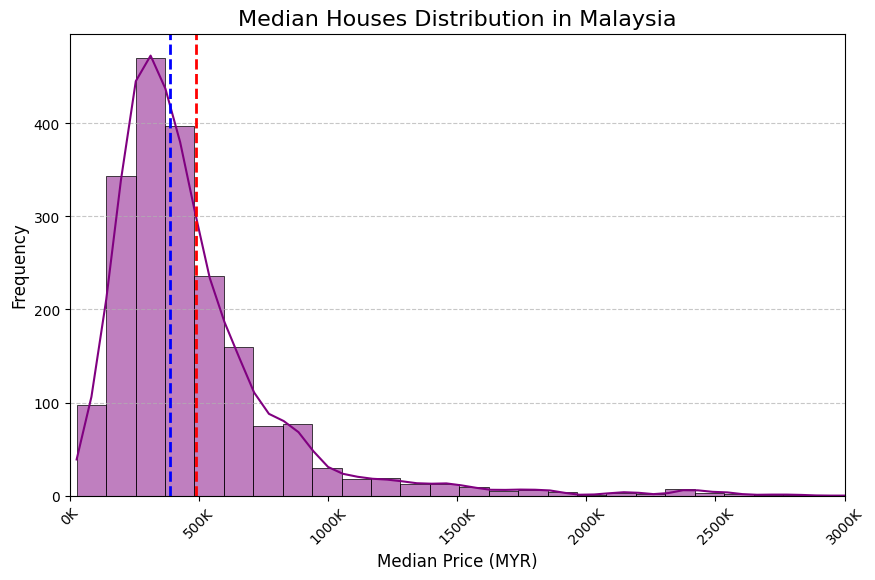

In [14]:
plt.figure(figsize=(10, 6)) #creates a figure of 10 inches wide and 6 inches tall
sns.histplot(data['Median_Price'], kde=True, color='purple', bins=100, kde_kws={'bw_adjust': 0.5}) #plot histogram
plt.title('Median Houses Distribution in Malaysia', fontsize=16) #sets the title of the histograam
plt.xlabel('Median Price (MYR)', fontsize=12) #label the x axis
plt.ylabel('Frequency', fontsize=12) #label the y axis
plt.grid(axis='y', linestyle='--', alpha=0.7) #add gridlines to the histogram
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter)) #change the label to thousands(K)
plt.xticks(rotation=45) #rotate x label 45 degree
plt.xlim(0, 3000 * 1000) #put limit on x axis
mean_value = data['Median_Price'].mean() #calculate mean
median_value = data['Median_Price'].median() #calculate median
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median') #label median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean') #label mean
plt.show()  #display plot



**Problem Statement:**
What is the most frequent median price property that has been transacted

**Result and Discussion:**
From the histogram plot, we can see the most frequent traded property prices are at the median of around RM250k. We can see from the shape of the histogram it is skewed to the right indicated by the longer short tail that we can see on the right. This indicate mode which is the highest bar greater than the median, while the median is greater than the mean. This conclusion can be derived based on the right skewness of the histogram.

So as per the histogram, the mode is the highest bar indicates the mode. While the blue line indicates the median and the red line indicates the mean. This indicated that the mean is affected by a few transaction that has been made with less frequency but higher prices. Since there is no ceiling on property prices, we can expect some outliers that will bring this mean higher.

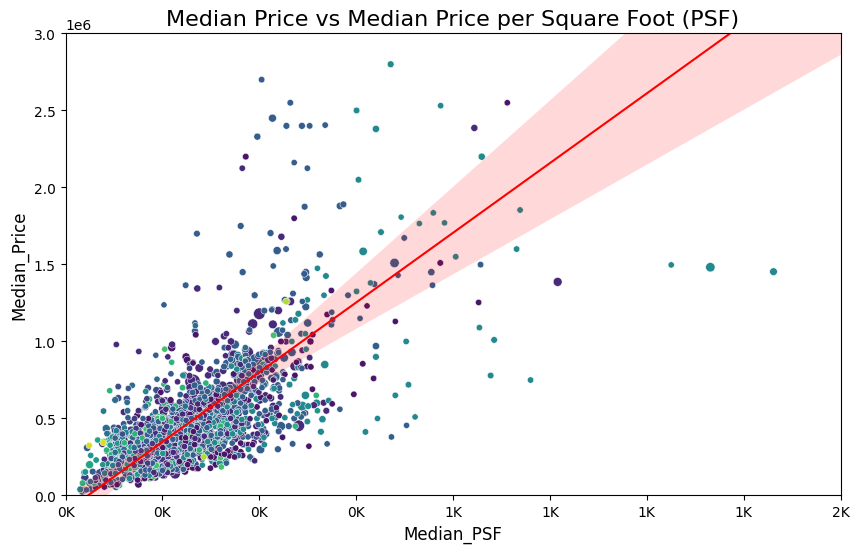

In [ ]:
plt.figure(figsize=(10, 6)) #creates a figure of 10 inches wide and 6 inches tall
sns.scatterplot(data=data, x='Median_PSF', y='Median_Price', hue='State', palette='viridis', size='Transactions', sizes=(20, 200), legend=False) #plot a scatter plot graph
plt.title('Median Price vs Median Price per Square Foot (PSF)', fontsize=16) #label the title
plt.xlabel('Median Price per Square Foot (MYR)', fontsize=12) #label the x axis
plt.ylabel('Median Price (MYR)', fontsize=12) #label the y axis
plt.xlim(0, 2000) #put limit to the x axis
plt.ylim(0, 3000 * 1000) #put limit to the y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter)) #change the number to thousands
sns.regplot(data=data, x='Median_PSF', y='Median_Price', scatter=False,
            color='red', line_kws={'linewidth': 1.5}) #draw the regression line
plt.show() #show the plot

**Problem Statement:** What is the relationship between median price and median price per square foot

**Result and Discussion:** Using the scatter plot, we can see the distribution of both of our data, which are the median price property and median price per square foot of the property. We also can see the regression line in red of the two data which reflects the relationship of these two factors. As we can see the line, we can conclude that these two data are directly proportional in increasing manner. Meaning as the price increases, the price per square foot also increases and vice versa. We can infer that, as the prices are higher, we can expect the size of the property is bigger. However the impact an increase of price per square foot will result in a greater increase in the house price. In other words, a higher house price might not indicate a high median psf price or the size of the house, but a high median psf will absolutely indicate a higher price house.

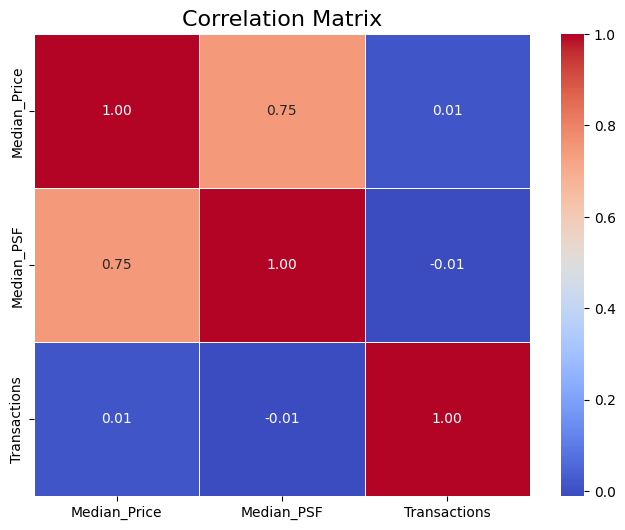

In [ ]:
correlation_matrix = data[['Median_Price', 'Median_PSF', 'Transactions']].corr() #calculate the correlation matrix
plt.figure(figsize=(8, 6)) #create a frame with 8 inches wide and 6 inches tall
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #create a heatmap
plt.title('Correlation Matrix', fontsize=16) #label the title
plt.show() #display the plot

**Problem Statement:** Is there a correlation between the numerical data that we have?

**Result and Discussion:** As per our correlation matrix display, we can see a positive correlation between the median price and median price per square foot. This adds on to the confidence of our previous analysis on their direct proportional relationship. On the other hand, the transaction to the other factors are close to zero indicating there is negligable correlation of transactions with other factors.

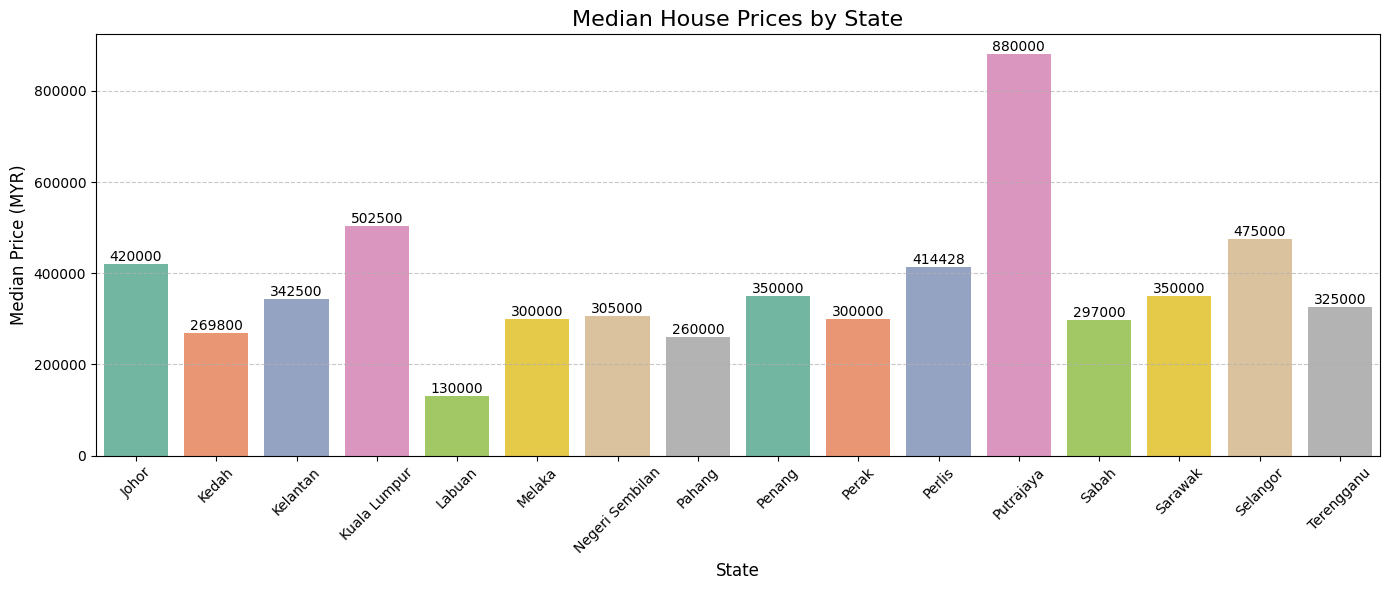

In [ ]:
plt.figure(figsize=(14, 6)) #create a frame of 14 inches wide and 6 inches tall
median_prices = data.groupby('State')['Median_Price'].median().reset_index() #group the median prices by states
sns.barplot(x='State', y='Median_Price', data=median_prices, estimator=np.median,
            hue='State', palette='Set2', dodge=False) #create a bar plot
for index, row in median_prices.iterrows():
    plt.text(index, row['Median_Price'], f'{row["Median_Price"]:.0f}',
             color='black', ha='center', va='bottom') #label the value of each state at the top of the bar
plt.title('Median House Prices by State', fontsize=16) #label the title
plt.xlabel('State', fontsize=12) #label the x axis
plt.ylabel('Median Price (MYR)', fontsize=12) #label the y axis
plt.xticks(rotation=45) #rotate x axis label at a 45 degree angle
plt.grid(axis='y', linestyle='--', alpha=0.7) #add gridlines
plt.tight_layout() #ensure the layout fits nicely into the frame
plt.show() #display the plot

**Problem Statement:** What is the median price for the property across all states

**Result and Discussion:** As per our bar graph above, we can see that Putrajaya actually have the highest median prices that almost double the prices at Kuala Lumpur. The second and third place are followed by Kuala Lumpur and Selangor. I would like to find out more on this findings. To delve further, I want to compare the house type in the top 3 states.

In [19]:
house_counts = data.groupby(['State', 'Type']).size().reset_index(name='Count') #count each house type by state
print(house_counts[house_counts['State'] == 'Putrajaya']) #display for putrajaya
print(house_counts[house_counts['State'] == 'Kuala Lumpur']) #display for kuala lumpur
print(house_counts[house_counts['State'] == 'Selangor']) #display for selangor

         State                     Type  Count
133  Putrajaya  Bungalow, Terrace House      1
134  Putrajaya                     Flat      1
135  Putrajaya    Semi D, Terrace House      1
           State                          Type  Count
37  Kuala Lumpur                     Apartment     15
38  Kuala Lumpur              Bungalow, Semi D      2
39  Kuala Lumpur       Bungalow, Terrace House      2
40  Kuala Lumpur                 Cluster House      1
41  Kuala Lumpur  Cluster House, Terrace House      1
42  Kuala Lumpur                   Condominium     73
43  Kuala Lumpur                          Flat     16
44  Kuala Lumpur             Flat, Condominium      1
45  Kuala Lumpur         Semi D, Terrace House      1
46  Kuala Lumpur             Service Residence     29
47  Kuala Lumpur                 Terrace House     30
48  Kuala Lumpur       Terrace House, Bungalow      1
49  Kuala Lumpur  Terrace House, Cluster House      2
50  Kuala Lumpur         Terrace House, Semi D      1
51

**Discussion:** As per the table above, we can see the houses in Putrajaya actually contain only 3 transactions. 2 out of the 3 are bungalow or terrace houses which are higher prices due to land and size. While the transactions for Kuala Lumpur and Selangor has more frequency and contain more diverse house type. However the house type for Kuala Lumpur are skewed to condominium while Selangor is skewed to Terrace House. From this table, we can neglect the result from Putrajaya due to low data.

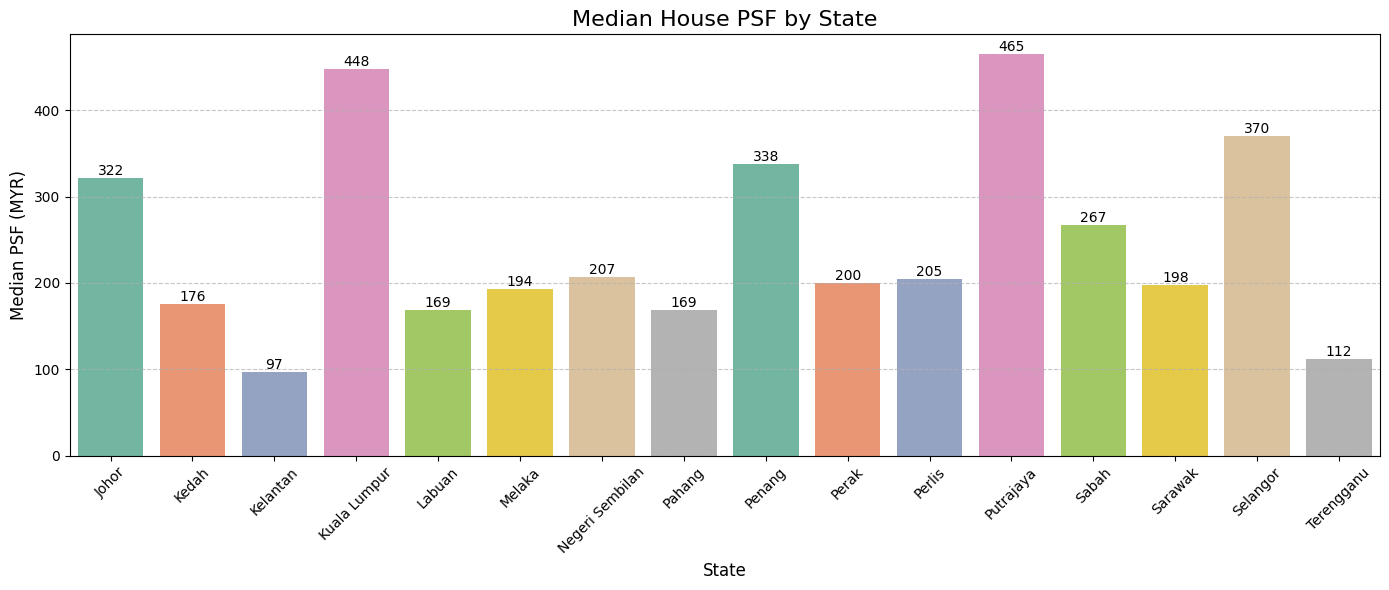

In [ ]:
plt.figure(figsize=(14, 6)) #set the frame
median_prices = data.groupby('State')['Median_PSF'].median().reset_index() #group the median psf by state
sns.barplot(x='State', y='Median_PSF', data=median_prices, estimator=np.median,
            hue='State', palette='Set2', dodge=False) #create the bar plot
for index, row in median_prices.iterrows():
    plt.text(index, row['Median_PSF'], f'{row["Median_PSF"]:.0f}',
             color='black', ha='center', va='bottom') #label the value of each state on top of the bar
plt.title('Median House PSF by State', fontsize=16) #label the title
plt.xlabel('State', fontsize=12) #label the x axis
plt.ylabel('Median PSF (MYR)', fontsize=12) #label the y axis
plt.xticks(rotation=45) #rotate the x axis label to 45 degree angle
plt.grid(axis='y', linestyle='--', alpha=0.7) #create gridlines
plt.tight_layout() #fit the graph to the frame
plt.show() #show the plot

**Problem Statement**: What about the median price per square foot of the property by state?

**Result and Discussion:** As per the graph, neglecting Putrajaya due to low data points, we can see Kuala Lumpur have the highest psf prices. Even when comparing to Selangor data which is more skewed towards terrace houses, which are generally more expensive due to landed and bigger sizes, Kuala Lumpur still maintain as the most expensive houses psf.

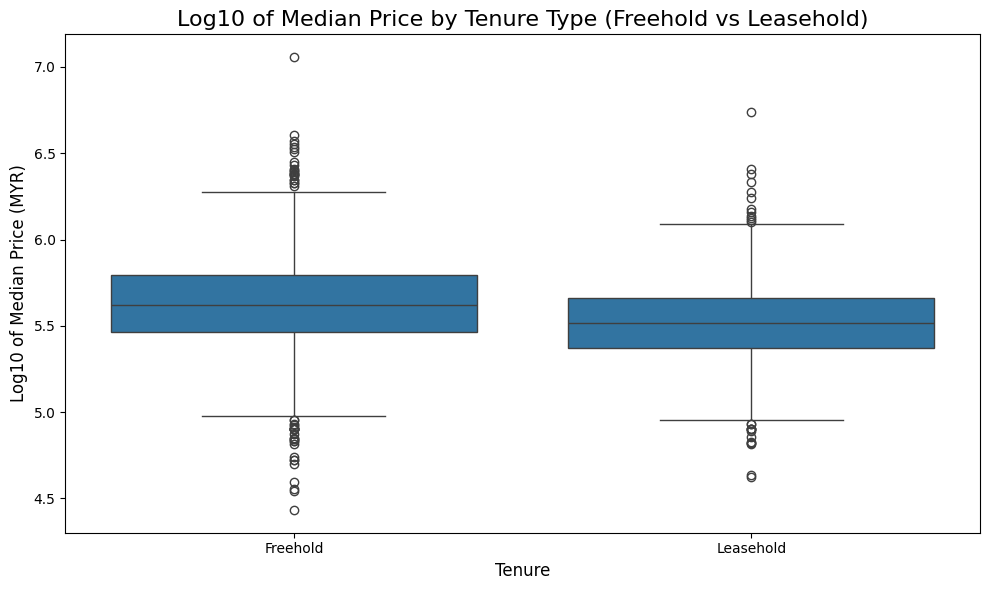

In [16]:
filtered_data = data[data['Tenure'].isin(['Freehold', 'Leasehold'])].copy() # Filter the data for only Freehold and Leasehold
filtered_data.loc[:, 'Log10_Median_Price'] = np.log10(filtered_data['Median_Price']) # Transform the Median Price into log10 scale
plt.figure(figsize=(10, 6)) # Set up the figure
sns.boxplot(x='Tenure', y='Log10_Median_Price', data=filtered_data) # Create a box plot to compare log10 Median Price by Tenure
plt.title('Log10 of Median Price by Tenure Type (Freehold vs Leasehold)', fontsize=16) #label the title
plt.xlabel('Tenure', fontsize=12) #label the x axis
plt.ylabel('Log10 of Median Price (MYR)', fontsize=12) #label the y-axis
plt.tight_layout() #ensure the plot is fit to the frame
plt.show() # Show the plot

**Problem Statement:** What is the median prices comparison on property Tenure?

**Result and Discussion:** As expected, we can see that the freehold properties are sold at higher prices. We can see the boxplot for Freehold are much higher on the y-axis compared to the Leasehold. Point to note also, we transform the data using logarithm to ensure that we can fit it into the boxplot.

# **Conclusion**

In this analysis of the House Prices in Malaysia dataset for 2025, we uncovered several key insights regarding the housing market. Our exploratory data analysis highlighted the distribution of median property prices, revealing that the most frequently transacted properties have a median price around RM250k. The analysis also indicated a right-skewed distribution, suggesting the presence of outliers that influence the mean price.

We found a strong positive correlation between median price and median price per square foot, demonstrating that as property prices increase, so does the price per square foot. This relationship reinforces the notion that larger properties tend to command higher prices.

Further examination of median prices across different states revealed that Putrajaya has the highest median price, followed by Kuala Lumpur and Selangor. Upon further investigation, we found Putrajaya has very few datapoints hence we neglect the results for now. We also found that the Kuala Lumpur house type has more condominium type while Selangor has more terraced houses type.

Additionally, our analysis of the median price per square foot indicated that Kuala Lumpur remains the most expensive state, again neglecting Putrajaya due to low data points. This shows that Kuala Lumpur have the most expensive house prices compares to the other states.

Finally, the comparison of property tenure showed that freehold properties are generally sold at higher prices than leasehold properties, highlighting the premium placed on ownership type in the market.

Overall, this analysis provides valuable insights into the Malaysian housing market, helping stakeholders understand pricing dynamics and make informed decisions. Future research could delve deeper into the factors influencing these trends and explore the impact of economic conditions on property prices.